In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3.0, -0.1, -0.2],
              [0.1, 7.0, -0.3],
              [0.3, -0.2, 10.0]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.array([0.0, 0.0, 0.0]) 
tolerances = [1e-3, 1e-6, 1e-9] 

def solve_homework(method_func, A, b, x0, tol):
    return method_func(A, b, x0, tol, 100)

def jacobi_hw(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        
        err = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(err)
        if err < tol:
            return x_new, k + 1, errors
        x = x_new
    return x, max_iter, errors

def gauss_seidel_hw(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        
        err = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(err)
        if err < tol:
            return x_new, k + 1, errors
        x = x_new
    return x, max_iter, errors

for t in tolerances:
    _, j_it, _ = jacobi_hw(A, b, x0, t, 100)
    _, gs_it, _ = gauss_seidel_hw(A, b, x0, t, 100)
    print(f"Tolerance {t}: Jacobi = {j_it} iterations, Gauss-Seidel = {gs_it} iterations")

Tolerance 0.001: Jacobi = 4 iterations, Gauss-Seidel = 4 iterations
Tolerance 1e-06: Jacobi = 7 iterations, Gauss-Seidel = 5 iterations
Tolerance 1e-09: Jacobi = 9 iterations, Gauss-Seidel = 7 iterations


Tolerance 0.001: Jacobi = 4 iterations, Gauss-Seidel = 4 iterations
Tolerance 1e-06: Jacobi = 7 iterations, Gauss-Seidel = 5 iterations
Tolerance 1e-09: Jacobi = 9 iterations, Gauss-Seidel = 7 iterations


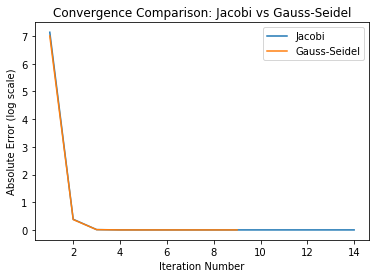

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3.0, -0.1, -0.2],
              [0.1, 7.0, -0.3],
              [0.3, -0.2, 10.0]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.array([0.0, 0.0, 0.0]) 

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        
        diff = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(diff)
        
        if diff < tol:
            return x_new, k + 1, errors
        x = x_new
    return x, max_iterations, errors

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        
        diff = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(diff)
        
        if diff < tol:
            return x_new, k + 1, errors
        x = x_new
    return x, max_iterations, errors

tols = [1e-3, 1e-6, 1e-9]
results = []

for tol in tols:
    j_sol, j_it, _ = jacobi(A, b, x0, tol, 100)
    gs_sol, gs_it, _ = gauss_seidel(A, b, x0, tol, 100)
    results.append({'tol': tol, 'jacobi': j_it, 'gs': gs_it})

_, _, j_history = jacobi(A, b, x0, 1e-15, 20)
_, _, gs_history = gauss_seidel(A, b, x0, 1e-15, 20)
for t in tolerances:
    _, j_it, _ = jacobi_hw(A, b, x0, t, 100)
    _, gs_it, _ = gauss_seidel_hw(A, b, x0, t, 100)
    print(f"Tolerance {t}: Jacobi = {j_it} iterations, Gauss-Seidel = {gs_it} iterations")

plt.figure()
plt.plot(range(1, len(j_history) + 1), j_history, label='Jacobi')
plt.plot(range(1, len(gs_history) + 1), gs_history, label='Gauss-Seidel')

plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error (log scale)')
plt.title('Convergence Comparison: Jacobi vs Gauss-Seidel')
plt.legend()


As the tolerance decreases, the required amount of iterations increases because each iteration only reduces the error by a certain fraction.